In [1]:
import pandas as pd
import numpy as np
from abc import ABC
from typing import Callable
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import math as ma
import random
import csv
from collections import Counter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Normalização de dados

In [2]:
class NormalizationData:
    
      def z_score(arr: np.ndarray):
        mean = arr.mean()
        std = arr.std()
        out = (arr - mean) / std
        return out

### Métricas de avaliação

In [3]:
class ClassificationMetrics:
    
    def accuracy(y_real: np.ndarray, y_predicted: np.ndarray) -> float:
        result = ((y_real == y_predicted).sum() / y_real.shape[0])
        return result 
    
    def precision(y_real: np.ndarray, y_predicted: np.ndarray) -> float:
        real = y_real.astype(bool)
        pred = y_predicted.astype(bool)
    
        T = real == 1
        F = ~T

        TP = pred[T].sum()
        FP = (~pred[F]).sum()

        result = (TP / (TP + FP))
        return result
    
    def recall(y_real: np.ndarray, y_predicted: np.ndarray) -> float:
        real = y_real.astype(bool)
        pred = y_predicted.astype(bool)
        
        T = real == True
        TP = pred[T].sum()
        FN = (~pred[T]).sum()
        
        result = (TP / (TP + FN))
        return result
    
    def f1_score(y_real: np.ndarray, y_predicted: np.ndarray) -> float:
        rec = ClassificationMetrics.recall(y_real, y_predicted)
        prec = ClassificationMetrics.precision(y_real, y_predicted)
        
        result = (2 * (rec * prec) / (rec + prec))
        return result

### Funções de distância - Euclidiana e Mahalanobis

In [4]:
class Euclidian():
    def dists(x1: np.ndarray, x2: np.ndarray) -> float:
        return np.sqrt(
            np.sum((x2 - x1) ** 2)
        )

class Mahalanobis():
    def dists(x1: np.ndarray, x2: np.ndarray) -> float:
        inv_cov = np.linalg.pinv(np.cov(X_train.T))
        return np.sqrt(
            (x1 - x2).T @ inv_cov @ (x1 - x2)
        )

### Algoritmo K-Nearest Neighbors (KNN)

In [5]:
class Knn():
    def __init__(self, x: np.ndarray, y: np.ndarray, k: int, dist_func: Callable[[np.ndarray, np.ndarray], float]):
        self.x = x
        self.y = y
        self.k = k
        self.dist_func = dist_func
        
    def fit(self, X, y):
        self.X = X
        self.y = y

    def calculate_dist(self, rown: np.ndarray, x: np.ndarray) -> np.ndarray:
        return np.apply_along_axis(
            lambda x_rown: self.dist_func(rown, x_rown),
            1,
            x
        )

    def k_nearest(self, dists: np.ndarray) -> np.ndarray:
        partition = np.argpartition(dists, self.k)

        result_id = partition[:self.k]

        return result_id

    def prediction(self, rown: np.ndarray) -> np.ndarray:

        dists_others_points = self.calculate_dist(rown, self.x)

        k_nearests_id = self.k_nearest(dists_others_points)

        class_points = self.y[k_nearests_id]

        unique_class, counts = np.unique(class_points, return_counts=True)

        most_freq_class_id = np.argmax(counts)

        return unique_class[most_freq_class_id]

    def predict(self, x: np.ndarray) -> np.ndarray:
        return np.apply_along_axis(
            self.prediction, 1, x
        ).reshape([-1, 1])

### Importação de dados

In [6]:
df = pd.read_csv('data/kc2.csv', delimiter=",", header=None)
new_df = df.drop_duplicates()

In [7]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,0.0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,415.0,59.0,50.0,51.0,1159.0,8411.31,0.01,103.53,81.24,870848.58,...,359.0,35.0,9.0,10.0,47.0,106.0,692.0,467.0,106.0,1.0
3,230.0,33.0,10.0,16.0,575.0,3732.82,0.03,39.82,93.74,148644.06,...,174.0,15.0,34.0,5.0,23.0,67.0,343.0,232.0,65.0,1.0
4,175.0,26.0,12.0,13.0,500.0,3123.96,0.03,29.48,105.96,92103.07,...,142.0,7.0,19.0,4.0,18.0,58.0,310.0,190.0,51.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,6.0,2.0,1.0,1.0,15.0,53.77,0.40,2.50,21.51,134.44,...,2.0,0.0,2.0,0.0,5.0,7.0,8.0,7.0,3.0,1.0
517,4.0,1.0,1.0,1.0,5.0,11.61,0.50,2.00,5.80,23.22,...,2.0,0.0,0.0,0.0,4.0,1.0,4.0,1.0,1.0,1.0
518,4.0,1.0,1.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,...,2.0,0.0,0.0,0.0,3.0,1.0,3.0,1.0,1.0,1.0
520,4.0,1.0,1.0,1.0,5.0,11.61,0.67,1.50,7.74,17.41,...,2.0,0.0,0.0,0.0,3.0,2.0,3.0,2.0,1.0,1.0


### Separação de dados

In [8]:
X = new_df.iloc[:,:-1].to_numpy()
y = new_df.iloc[:,-1].to_numpy() 

### Normalização de dados com Z_score

In [9]:
X_norm = np.empty_like(X)

for idx, col in enumerate(X.T):

    norm = NormalizationData.z_score(col)

    X_norm[:, idx] = norm

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=40, stratify=y)

### Treinamento dos modelos

#### KNN - usando distância Euclidiana

In [32]:
k = 5

knn_euclidian = Knn(
    X_train,
    y_train,
    k,
    Euclidian.dists
)

knn_euclidian.fit(X_train, y_train)

In [33]:
preds_euclidian = knn_euclidian.predict(X_test)
accuracy = ClassificationMetrics.accuracy(y_test, preds_euclidian)
precision = ClassificationMetrics.precision(y_test, preds_euclidian)
recall = ClassificationMetrics.recall(y_test, preds_euclidian)
f1_score = ClassificationMetrics.f1_score(y_test, preds_euclidian)

In [34]:
print("------ KNN Metrics Results ------")
print("Accuracy Model: ", accuracy)
print("Precision Model: ", precision)
print("Recall Model: ", recall)
print("F1_score Model: ", f1_score)

------ KNN Metrics Results ------
Accuracy Model:  71.89380530973452
Precision Model:  0.14285714285714285
Recall Model:  0.375
F1_score Model:  0.20689655172413796


#### KNN - usando distância Mahalanobis

In [35]:
k = 5

knn_mahalanobis = Knn(
    X_train,
    y_train,
    k,
    Mahalanobis.dists
)

knn_euclidian.fit(X_train, y_train)

In [36]:
preds_mahalanobis = knn_mahalanobis.predict(X_test)
accuracy = ClassificationMetrics.accuracy(y_test, preds_mahalanobis)
precision = ClassificationMetrics.precision(y_test, preds_mahalanobis)
recall = ClassificationMetrics.recall(y_test, preds_mahalanobis)
f1_score = ClassificationMetrics.f1_score(y_test, preds_mahalanobis)

In [37]:
print("------ KNN Metrics Results ------")
print("Accuracy Model: ", accuracy)
print("Precision Model: ", precision)
print("Recall Model: ", recall)
print("F1_score Model: ", f1_score)

------ KNN Metrics Results ------
Accuracy Model:  75.79646017699115
Precision Model:  0.08433734939759036
Recall Model:  0.21875
F1_score Model:  0.12173913043478261


#### Árvore de Decisão

In [38]:
dt = DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(X_train, y_train)
prediction = dt.predict(X_test)
accuracy = ClassificationMetrics.accuracy(y_test, prediction)
precision = ClassificationMetrics.precision(y_test, prediction)
recall = ClassificationMetrics.recall(y_test, prediction)
f1_score = ClassificationMetrics.f1_score(y_test, prediction)

In [39]:
print("------ Decision Tree Metrics Results ------")
print("Accuracy Model: ", accuracy)
print("Precision Model: ", precision)
print("Recall Model: ", recall)
print("F1_score Model: ", f1_score)

------ Decision Tree Metrics Results ------
Accuracy Model:  0.6814159292035398
Precision Model:  0.16883116883116883
Recall Model:  0.40625
F1_score Model:  0.23853211009174313


### Avaliação dos modelos com K folds

In [40]:
class Kfolds():
    
    def __init__(self, folds = 10):
        self.folds = folds
        
    def fold(self):
        
        np.random.shuffle(self.data)
        n = self.data.shape[0]
        self.n_folds = []
        folds_size = ma.ceil(n / self.folds)     
        for i in range(0, n, folds_size):
            end = i + folds_size
            end = n if end > n else end
            fold = self.data[i: end,:]
            self.n_folds.append(fold)
            
    def predict(self, index):
        folds = self.n_folds[:]
        
        test_fold = folds.pop(index)
        train_fold = np.vstack(folds)
        
        x_train = train_fold[:, :-1]
        y_train = train_fold[:, -1]
        x_test = test_fold[:, :-1]
        y_test = test_fold[:, -1]
        
        self.model.fit(x_train, y_train)
        pred = self.model.predict(x_test)
        
        return pred, y_test
    
    def folds_results_metrics(self):
        
        self.accuracies = []
        self.precisions = []
        self.recalls = []
        self.f1_score = []
        
        for i in range(self.folds):
            pred, y_test = self.predict(i)
            accuracy = ClassificationMetrics.accuracy(y_test, pred)
            precision = ClassificationMetrics.precision(y_test, pred)
            recall = ClassificationMetrics.recall(y_test, pred)
            f1_score = ClassificationMetrics.f1_score(y_test, pred)
            
            self.accuracies.append(accuracy)
            self.precisions.append(precision)
            self.recalls.append(recall)
            self.f1_score.append(f1_score)
            
        self.accurancy_mean = np.mean(self.accuracies)
        self.precision_mean = np.mean(self.precisions)
        self.recall_mean = np.mean(self.recalls)
        self.f1_score_mean = np.mean(self.f1_score)
        
        self.accurancy_std = np.std(self.accuracies)
        self.precision_std = np.std(self.precisions)
        self.recall_std = np.std(self.recalls)
        self.f1_score_std = np.std(self.f1_score)
        
    def fit_folds(self, model, x, y):
        self.data = np.c_[ x, y ]
        self.model = model
        self.fold()
        self.folds_results_metrics()

In [41]:
models = {
    'Árvore de Decisão' : dt,
    'K-NN com euclidiana': knn_euclidian,
    'K-NN com mahalanobis': knn_mahalanobis
}
models_names = list(models.keys())

In [42]:
accuracies_means = []
precisions_means = []
f1_score_means = []
recalls_means = []

accuracies_stds = []
precisions_stds = []
f1_score_stds = []
recalls_stds = []

for model_name, model in models.items():
    kfolds = Kfolds()
    kfolds.fit_folds(model, X, y)

    accuracies_means.append(kfolds.accurancy_mean)
    precisions_means.append(kfolds.precision_mean)
    recalls_means.append(kfolds.recall_mean)
    f1_score_means.append(kfolds.f1_score_mean)

    accuracies_stds.append(kfolds.accurancy_std)
    precisions_stds.append(kfolds.precision_std)
    recalls_stds.append(kfolds.recall_std)
    f1_score_stds.append(kfolds.f1_score_std)

### Resultados das métricas com K-fold 

In [43]:
metrics = ["Acurácia", "Precisão", "Revocação", "F1-Score"]
dt_metrics_mean, knn_eucli_metrics_mean, knn_mahal_metrics_mean = np.array([accuracies_means, precisions_means, recalls_means, f1_score_means]).T
dt_metrics_std, knn_eucli_metrics_std, knn_mahal_metrics_std = np.array([accuracies_stds, precisions_stds, recalls_stds, f1_score_stds]).T

#### Média das métricas

In [44]:
print("------ Media - Decision Tree K-folds Results ------")
print("Accuracy Model: ", dt_metrics_mean[0])
print("Precision Model: ", dt_metrics_mean[1])
print("Recall Model: ", dt_metrics_mean[2])
print("F1_score Model: ", dt_metrics_mean[3])

------ Media - Decision Tree K-folds Results ------
Accuracy Model:  0.7083732057416269
Precision Model:  0.18468697537333584
Recall Model:  0.47861111111111104
F1_score Model:  0.26222391454098765


In [45]:
print("------ Media - K-nn with euclidian K-folds Results ------")
print("Accuracy Model: ", knn_eucli_metrics_mean[0])
print("Precision Model: ", knn_eucli_metrics_mean[1])
print("Recall Model: ", knn_eucli_metrics_mean[2])
print("F1_score Model: ", knn_eucli_metrics_mean[3])

------ Media - K-nn with euclidian K-folds Results ------
Accuracy Model:  25.723444976076554
Precision Model:  0.042354257821443586
Recall Model:  0.1113127558715794
F1_score Model:  nan


In [46]:
print("------ Media - K-nn with mahalanobis K-folds Results ------")
print("Accuracy Model: ", knn_mahal_metrics_mean[0])
print("Precision Model: ", knn_mahal_metrics_mean[1])
print("Recall Model: ", knn_mahal_metrics_mean[2])
print("F1_score Model: ", knn_mahal_metrics_mean[3])

------ Media - K-nn with mahalanobis K-folds Results ------
Accuracy Model:  24.539553429027112
Precision Model:  0.04652328750154837
Recall Model:  0.11535714285714287
F1_score Model:  nan


#### Desvio padrão das métricas

In [26]:
print("------ Standard dev - Decision Tree K-folds Results ------")
print("Accuracy Model: ", dt_metrics_std[0])
print("Precision Model: ", dt_metrics_std[1])
print("Recall Model: ", dt_metrics_std[2])
print("F1_score Model: ", dt_metrics_std[3])

------ Standard dev - Decision Tree K-folds Results ------
Accuracy Model:  0.08176021804946637
Precision Model:  0.0497266619655153
Recall Model:  0.112221148145178
F1_score Model:  0.05913901329293411


In [27]:
print("------ Standard dev - K-nn with euclidian K-folds Results ------")
print("Accuracy Model: ", knn_eucli_metrics_std[0])
print("Precision Model: ", knn_eucli_metrics_std[1])
print("Recall Model: ", knn_eucli_metrics_std[2])
print("F1_score Model: ", knn_eucli_metrics_std[3])

------ Standard dev - K-nn with euclidian K-folds Results ------
Accuracy Model:  5.709915398394763
Precision Model:  0.1928571428571429
Recall Model:  0.30000000000000004
F1_score Model:  nan


In [28]:
print("------ Standard dev - K-nn with mahalanobis K-folds Results ------")
print("Accuracy Model: ", knn_mahal_metrics_std[0])
print("Precision Model: ", knn_mahal_metrics_std[1])
print("Recall Model: ", knn_mahal_metrics_std[2])
print("F1_score Model: ", knn_mahal_metrics_std[3])

------ Standard dev - K-nn with mahalanobis K-folds Results ------
Accuracy Model:  2.2722556045441937
Precision Model:  0.015103074399207087
Recall Model:  0.03823589244511471
F1_score Model:  nan


### Visualização dos resultados das métricas por modelo

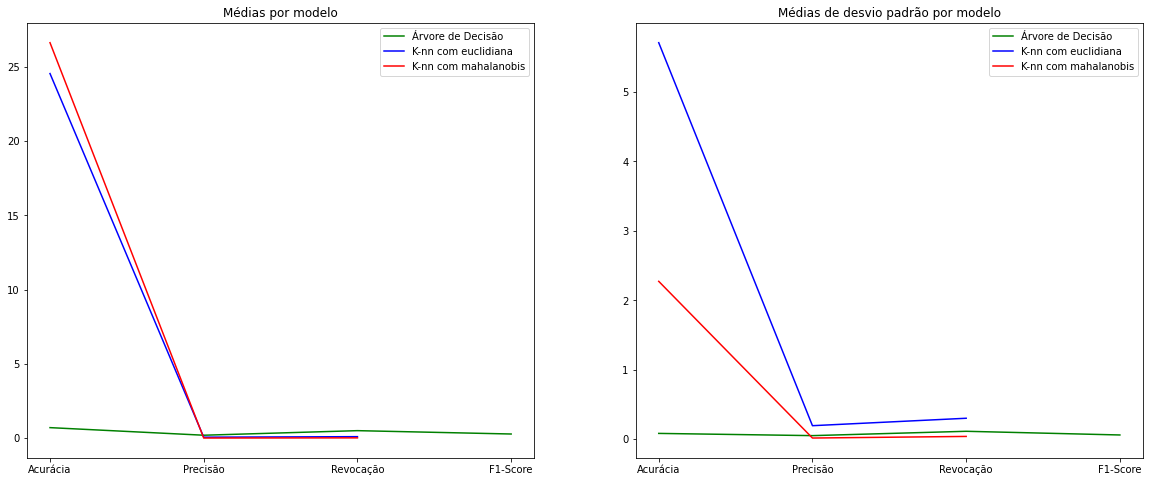

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

ax1.set_title("Médias por modelo")
ax1.plot(metrics, dt_metrics_mean, 'g', label="Árvore de Decisão")
ax1.plot(metrics, knn_eucli_metrics_mean, 'b', label="K-nn com euclidiana")
ax1.plot(metrics, knn_mahal_metrics_mean, 'r', label="K-nn com mahalanobis")
ax1.legend()

ax2.set_title("Médias de desvio padrão por modelo")
ax2.plot(metrics, dt_metrics_std, 'g', label="Árvore de Decisão")
ax2.plot(metrics, knn_eucli_metrics_std, 'b', label="K-nn com euclidiana")
ax2.plot(metrics, knn_mahal_metrics_std, 'r', label="K-nn com mahalanobis")
ax2.legend()